In [12]:
from pathlib import Path
import os

ROOT = Path("/Users/Admin/Desktop/PARA-OS/01_Projects/Learning-Design-ML-Systems/Data-augmentation-DMLS")

if ROOT.is_dir():
    print(f"ROOT directory exists hence changing directory to '{ROOT.name}'")
    os.chdir(ROOT)
else:
    raise NotADirectoryError

ROOT directory exists hence changing directory to 'Data-augmentation-DMLS'


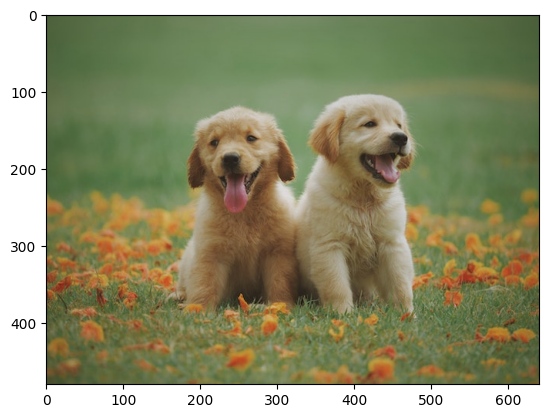

In [16]:
import torch # noqa
from torchvision import transforms # noqa
from PIL import Image # noqa
import matplotlib.pyplot as plt # noqa
# import torchvision.transforms as transforms
from torchvision.models import resnet50 # noqa



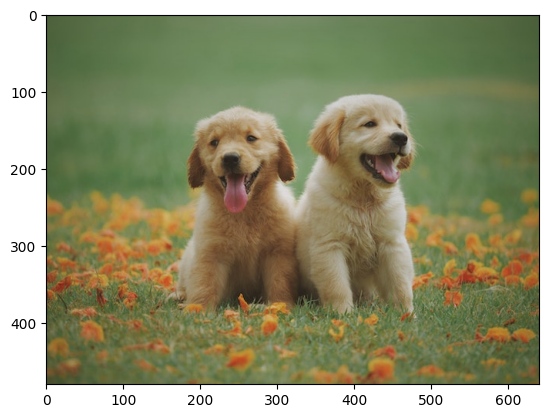

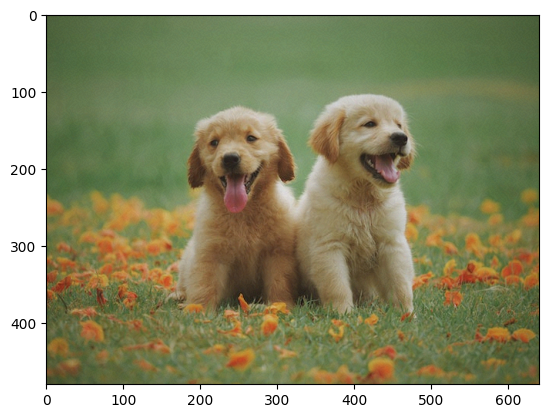

In [19]:

# Load the image
image = Image.open(ROOT / "sample_data/puppies.jpg")
plt.imshow(image)
plt.show()

# Define the transformation
transform = transforms.Compose([
    transforms.ToTensor()
])

# Apply the transformation
image = transform(image).unsqueeze(0)

image.requires_grad = True
# Load the pretrained model
model = resnet50(pretrained=True)

# Set the model in evaluation mode
model.eval()

# Create a target class
target = torch.tensor([243])  # Class 'bull mastiff' for example

# Set the loss
loss = torch.nn.CrossEntropyLoss()

# Calculate the loss
output = model(image)
initial_loss = loss(output, target)

# Calculate the gradients
initial_loss.backward()

# Generate the adversarial image
epsilon = 0.01
adversarial_image = image + epsilon * image.grad.sign()

# Clip the adversarial image to [0, 1]
adversarial_image = torch.clamp(adversarial_image, 0, 1)

# Display the adversarial image
plt.imshow(transforms.ToPILImage()(adversarial_image.squeeze()))
plt.show()


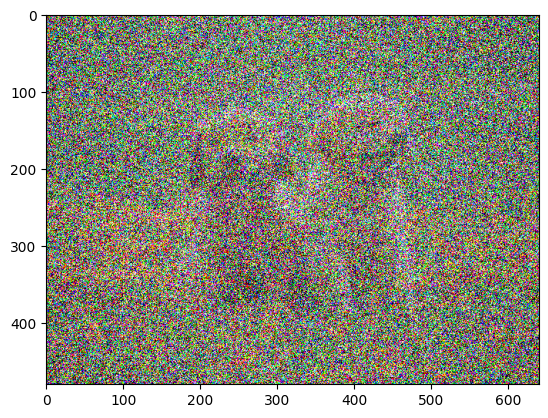

In [21]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Load an image
image = Image.open(ROOT / "sample_data/puppies.jpg")

# Convert the image to a tensor
transform = transforms.ToTensor()
image = transform(image)

# Generate random noise
noise = torch.randn(image.size())

# Add the noise to the image
noisy_image = image + noise

# Clip the values of the noisy image to be between 0 and 1
noisy_image = torch.clamp(noisy_image, 0., 1.)

# Convert the tensor back to an image
transform = transforms.ToPILImage()
noisy_image = transform(noisy_image)

# Display the image
plt.imshow(noisy_image)
plt.show()

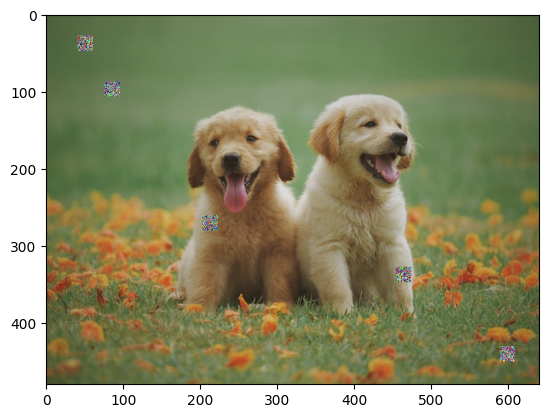

In [23]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# Load an image
image = Image.open(ROOT / "sample_data/puppies.jpg")

# Convert the image to a tensor
transform = transforms.ToTensor()
image = transform(image)

# Define the size of the patch and the number of patches
patch_size = (20, 20)  # height, width
num_patches = 5

# Apply the patches
for _ in range(num_patches):
    # Generate random coordinates for the top-left corner of the patch
    x = torch.randint(0, image.size(1) - patch_size[0], (1,)).item()
    y = torch.randint(0, image.size(2) - patch_size[1], (1,)).item()

    # Generate a random patch
    patch = torch.rand((3, *patch_size))

    # Apply the patch
    image[:, x:x+patch_size[0], y:y+patch_size[1]] = patch

# Convert the tensor back to an image
transform = transforms.ToPILImage()
patched_image = transform(image)

# Display the image
plt.imshow(patched_image)
plt.show()

use Lambda transform to apply the custom patches